# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [128]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [129]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [130]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [131]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [132]:
# Extract all rows of data
table = soup.find('table', class_='table')
rows = table.find_all('tr')
print(rows)

[<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>, <tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [133]:
# Create an empty list
headers = []
rows = []

# # Loop through the rows

header_row = table.find('tr')  # or table.find('tr') if no 'thead'
for th in header_row.find_all('th'):
    headers.append(th.text.strip())


for tr in table.find('tbody').find_all('tr'):
    row = [td.text.strip() for td in tr.find_all('td')]
    rows.append(row)


In [156]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Create a DataFrame from the extracted headers and rows, skipping the first row
mars_df = pd.DataFrame(rows[1:], columns=headers)

# Display the DataFrame to check if the first row is skipped
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [157]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [158]:
# Examine data type of each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [159]:
# Change data types for data analysis

# Convert 'id' to object
mars_df['id'] = mars_df['id'].astype(str)

# Convert 'terrestrial_date' to datetime
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

# Convert 'sol' to int32, handling missing values
mars_df['sol'] = mars_df['sol'].fillna(0).astype('int32')

# Convert 'ls' to int32, handling missing values
mars_df['ls'] = mars_df['ls'].fillna(0).astype('int32')

# Convert 'month' to int32, handling missing values
mars_df['month'] = mars_df['month'].fillna(0).astype('int32')

In [160]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                    object
pressure                    object
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [161]:
# 1. How many months are there on Mars?
max_month = mars_df['month'].max()
max_month

12

In [162]:
# 2. How many sols (Martian days) worth of data are there?
total_sol = mars_df['sol'].count()
total_sol

1867

In [164]:
# 3. What is the average minimum temperature by month?
# average_min_temp_per_month = mars_df.groupby('month')['min_temp'].mean().reset_index()
# average_min_temp_per_month.columns = ['month', 'average_min_temp']
# average_min_temp_per_month


# Convert 'min_temp' column to numeric type, coercing errors to NaN
mars_df['min_temp'] = pd.to_numeric(mars_df['min_temp'], errors='coerce')

# Calculate the average min_temp per month
average_min_temp_per_month = mars_df.groupby('month')['min_temp'].mean().reset_index()
average_min_temp_per_month.columns = ['month', 'average_min_temp']
average_min_temp_per_month

,month,average_min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


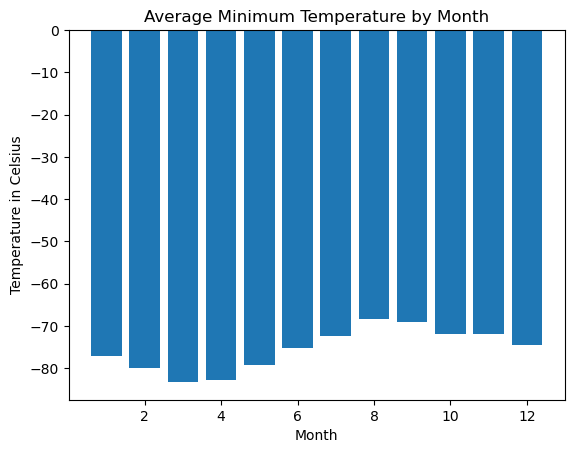

In [165]:
# Plot the average minimum temperature by month

plt.bar(average_min_temp_per_month['month'], average_min_temp_per_month['average_min_temp'])

plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month')

plt.show()

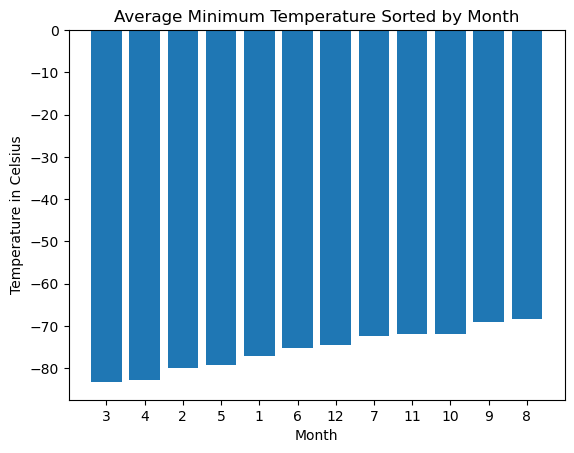

In [166]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_temp_df = average_min_temp_per_month.sort_values(by='average_min_temp').reset_index(drop=True)

plt.bar(range(len(sorted_temp_df)), sorted_temp_df['average_min_temp'])
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature Sorted by Month')
plt.xticks(range(len(sorted_temp_df)), sorted_temp_df['month'])

plt.show()

In [167]:
# 4. What is the average pressure by month?
# average_pressure_per_month_df = mars_df.groupby('month')['pressure'].mean().reset_index()
# average_pressure_per_month_df.columns = ['month', 'average_pressure']
# average_pressure_per_month_df

# Convert 'pressure' column to numeric type, coercing errors to NaN
mars_df['pressure'] = pd.to_numeric(mars_df['pressure'], errors='coerce')

# Calculate the average pressure per month
average_pressure_per_month_df = mars_df.groupby('month')['pressure'].mean().reset_index()
average_pressure_per_month_df.columns = ['month', 'average_pressure']
average_pressure_per_month_df

,month,average_pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


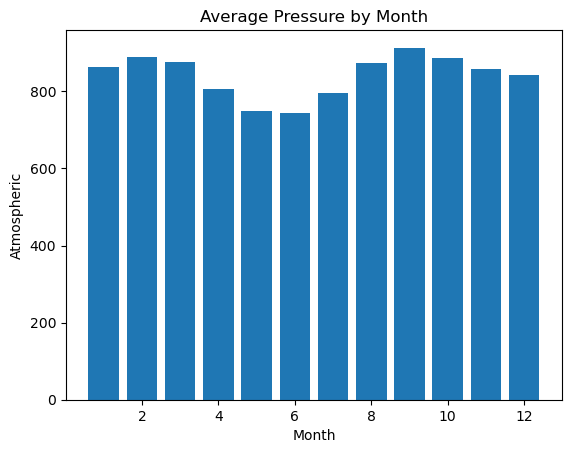

In [168]:
# Plot the average pressure by month
plt.bar(average_pressure_per_month_df['month'], average_pressure_per_month_df['average_pressure'])

plt.xlabel('Month')
plt.ylabel('Atmospheric')
plt.title('Average Pressure by Month')

plt.show()



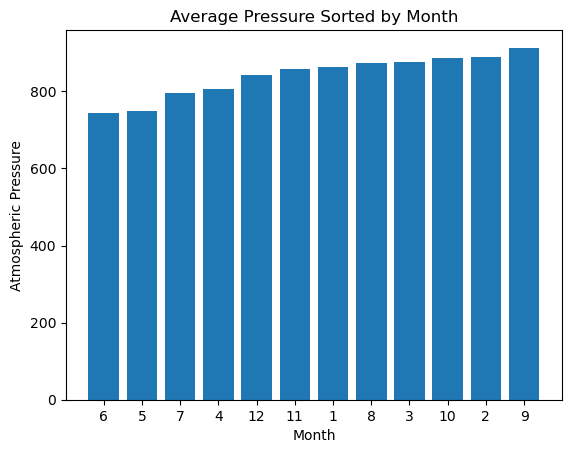

In [169]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_pressure_per_month_df = average_pressure_per_month_df.sort_values(by='average_pressure').reset_index(drop=True)

# Plot the sorted data
plt.bar(range(len(sorted_pressure_per_month_df)), sorted_pressure_per_month_df['average_pressure'])
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure Sorted by Month')
plt.xticks(range(len(sorted_pressure_per_month_df)), sorted_pressure_per_month_df['month'])

plt.show()


In [172]:
# Create a copy of the DataFrame to avoid modifying the original DataFrame
terrestrial_mars_df = mars_df.copy()

# Create a new column 'terrestrial_day' with values from 1 to the length of the DataFrame
terrestrial_mars_df['terrestrial_day'] = range(1, len(terrestrial_mars_df) + 1)

# Display the cleaned DataFrame
terrestrial_mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure,terrestrial_day
0,2,2012-08-16,10,155,6,-75.0,739.0,1
1,13,2012-08-17,11,156,6,-76.0,740.0,2
2,24,2012-08-18,12,156,6,-76.0,741.0,3
3,35,2012-08-19,13,157,6,-74.0,732.0,4
4,46,2012-08-20,14,157,6,-74.0,740.0,5
...,...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0,1863
1863,1892,2018-02-24,1974,134,5,-77.0,729.0,1864
1864,1894,2018-02-25,1975,134,5,-76.0,729.0,1865
1865,1893,2018-02-26,1976,135,5,-77.0,728.0,1866


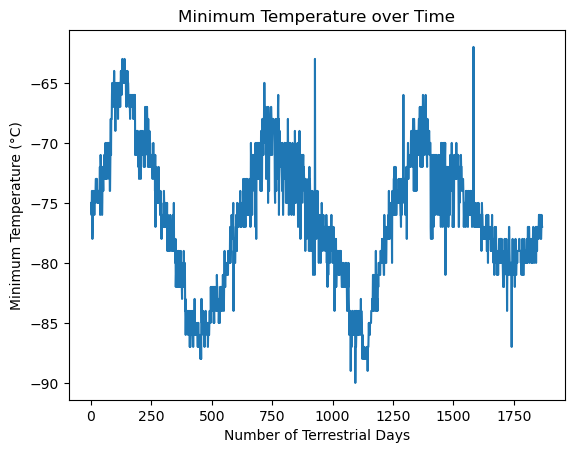

In [173]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(terrestrial_mars_df['terrestrial_day'], terrestrial_mars_df['min_temp'])

plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Minimum Temperature over Time')

# Show the plot
plt.show()

#### Temperature - Which month, on average, has the lowest temperature? The highest? (10 points)

Month 3 has the lowest average minimum temperature, month 8 has the highest.

#### Atmospheric Pressure - Which month, on average, has the lowest atmospheric pressure? The highest?

Month 6 has the lowest atmospheric pressure, month 9 has the highest. 

#### Year Length - How many terrestrial days exist in a Martian year?

There appear to be approximately 700 terrestrial days in a Martian year. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [174]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv', index=False, sep=',', encoding='utf-8')

In [175]:
browser.quit()